# Figure 3: Count core and accessory gene counts across ALL the multipopulation Roary pangenome analyses + essential gene analysis

### Import necessary packages

In [65]:
import pandas as pd
import numpy as np
import scipy as scipy
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as patches
import colorsys
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

## Figures 3A and 3B: Counting core and accessory genes in the Southwest US, given different pneumococcal pangenome analyses

### Define functions 

#### Count accessory/core genes for ALL samples

In [3]:
### Function to get the number of accessory genes across all samples in a Roary pangenome analysis

def get_num_acc_all_roary(csv_path):
    # Import and filter Roary results

    roary_all_c = pd.read_csv(csv_path, low_memory=False)
    panroary_ids_list =  list(roary_all_c["Gene"])

    # First round of filtering by fragment length >150bp OR general isolate frequency >10%
    tenp = (roary_all_c.shape[1]-14)/10 # Counting number of isolates (first 14 columns are metadata)

    roary_onefilt = roary_all_c[(roary_all_c['Avg group size nuc'] >= 150) | (roary_all_c['No. isolates'] >= tenp)]
    roary_onefilt.set_index('Gene', inplace=True)

    roary_isol = roary_onefilt.iloc[:,13:]

    roary_isol[~roary_isol.isnull()] = 1 
    roary_isol[roary_isol.isnull()] = 0 

    roary_isol = roary_isol.transpose()
    roary_isol.index.name='Accession'

    # Now we filter by frequency per each dataset (this can change depending on the datasets we want to include)

    def get_freq(dataframe):

        cog_list = []
        freq_list = []

        for element in dataframe.columns:

            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])

            cog_list.append(element)
            freq_list.append(cog_freq)

        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list

        return(freq_dataframe)

    freq_cog_roary = get_freq(roary_isol)
    acc_cog = freq_cog_roary.loc[(freq_cog_roary['freq'] > 0.05) & (freq_cog_roary['freq'] <= 0.95)]
    acccog_num = acc_cog.shape[0]
    acccog_name_list = list(acc_cog["COG_name"])

    print('# of accessory COGs in pangenome analysis - Roary :', acccog_num)

    # Get og output only for the accessory genes
    roary_acc_tag_matrix = roary_onefilt[roary_onefilt.index.isin(acccog_name_list)]
    roary_acc_tag_matrix = roary_acc_tag_matrix.iloc[:,13:]
    roary_tag_matrix = roary_onefilt.iloc[:,13:]
    
    return acccog_num

In [5]:
### Function to get the number of core genes across all samples in a Roary pangenome analysis

def get_num_core_all_roary(csv_path):
    
    roary_all_c = pd.read_csv(csv_path, low_memory=False)
    panroary_ids_list =  list(roary_all_c["Gene"])
    tenp = (roary_all_c.shape[1]-14)/10 # Counting number of isolates (first 14 columns are metadata)
    roary_onefilt = roary_all_c[(roary_all_c['Avg group size nuc'] >= 150) | (roary_all_c['No. isolates'] >= tenp)]

    roary_onefilt.set_index('Gene', inplace=True)

    roary_isol = roary_onefilt.iloc[:,13:]

    roary_isol[~roary_isol.isnull()] = 1 
    roary_isol[roary_isol.isnull()] = 0 

    roary_isol = roary_isol.transpose()
    roary_isol.index.name='Accession'

    def get_freq(dataframe):

        cog_list = []
        freq_list = []

        for element in dataframe.columns:

            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])

            cog_list.append(element)
            freq_list.append(cog_freq)

        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list

        return(freq_dataframe)

    # Get list of genes and their frequency for each dataset individually (and for all datasets as well

    freq_cog_roary = get_freq(roary_isol)

    # Now filter to only keep cogs with frequency over 95% across all samples
    core_cog = freq_cog_roary.loc[freq_cog_roary['freq'] > 0.95]
    corecog_num = core_cog.shape[0]
    corecog_name_list = list(core_cog["COG_name"])

    print('# of core COGs in pangenome analysis - Roary :', corecog_num)

    # Get og output only for the core genes
    roary_core_tag_matrix = roary_onefilt[roary_onefilt.index.isin(corecog_name_list)]
    roary_core_tag_matrix = roary_core_tag_matrix.iloc[:,13:]
    roary_tag_matrix = roary_onefilt.iloc[:,13:]

    return corecog_num

#### Count accessory/core genes across all populations - Roary+CLARC

In [35]:
def get_num_acc_all_clarc(csv_path):

    clarc_all_c = pd.read_csv(csv_path, index_col=0)
    
    def get_freq(dataframe):
    
        cog_list = []
        freq_list = []
    
        for element in dataframe.columns:
    
            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])
    
            cog_list.append(element)
            freq_list.append(cog_freq)
    
        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list
    
        return(freq_dataframe)
    
    freq_cog_clarc = get_freq(clarc_all_c)
    acc_cog = freq_cog_clarc.loc[(freq_cog_clarc['freq'] > 0.05) & (freq_cog_clarc['freq'] <= 0.95)]
    acccog_num = acc_cog.shape[0]
    acccog_name_list = list(acc_cog["COG_name"])
    
    print('# of accessory COGs in pangenome analysis - Roary+CLARC :', acccog_num)

    return acccog_num

In [39]:
def get_num_core_all_clarc(csv_path):

    clarc_all_c = pd.read_csv(csv_path, index_col=0)
    
    def get_freq(dataframe):
    
        cog_list = []
        freq_list = []
    
        for element in dataframe.columns:
    
            freq_dataframe = pd.DataFrame()
            cog_freq = (dataframe[element].sum())/(dataframe.shape[0])
    
            cog_list.append(element)
            freq_list.append(cog_freq)
    
        freq_dataframe['COG_name'] = cog_list
        freq_dataframe['freq'] = freq_list
    
        return(freq_dataframe)
    
    freq_cog_clarc = get_freq(clarc_all_c)
    core_cog = freq_cog_clarc.loc[(freq_cog_clarc['freq'] > 0.95)]
    corecog_num = core_cog.shape[0]
    corecog_name_list = list(core_cog["COG_name"])
    
    print('# of core COGs in pangenome analysis - Roary+CLARC :', corecog_num)

    return corecog_num

#### Count accessory/core genes for Southwest, USA only - Roary and Roary+CLARC

In [6]:
def get_num_acc_southwest_roary(csv_path_acc):
    
    pres_abs_sw_roary_acc = pd.read_csv(csv_path_acc, low_memory=False)
    pres_abs_sw_roary_acc.set_index(pres_abs_sw_roary_acc.columns[0], inplace=True)
    acc_num = len(pres_abs_sw_roary_acc.columns)
    
    return acc_num

In [7]:
def get_num_core_southwest_roary(csv_path_core):
    
    pres_abs_sw_roary_core = pd.read_csv(csv_path_core, low_memory=False)
    pres_abs_sw_roary_core.set_index(pres_abs_sw_roary_core.columns[0], inplace=True)
    core_num = len(pres_abs_sw_roary_core.columns)
    
    return core_num

In [8]:
def get_num_acc_southwest_clarc(csv_path_acc):
    
    pres_abs_sw_clarc_acc = pd.read_csv(csv_path_acc, low_memory=False)
    pres_abs_sw_clarc_acc.set_index(pres_abs_sw_clarc_acc.columns[0], inplace=True)
    clarc_acc_num = len(pres_abs_sw_clarc_acc.columns)
    
    return clarc_acc_num

In [9]:
def get_num_core_southwest_clarc(csv_path_core):
    
    pres_abs_sw_clarc_core = pd.read_csv(csv_path_core, low_memory=False)
    pres_abs_sw_clarc_core.set_index(pres_abs_sw_clarc_core.columns[0], inplace=True)
    clarc_core_num = len(pres_abs_sw_clarc_core.columns)
    
    return clarc_core_num

In [10]:
def get_clarc_cluster_results(csv_path_clarc_summary):

    core_cluster_num = None
    unique_core_cluster_cog_num = None
    acc_cluster_num = None
    unique_acc_cluster_cog_num = None
    
    # Finds digits in CLARC summary file
    pattern = re.compile(r'\d+')

    # Open the CLARC summary file and read line by line
    with open(csv_path_clarc_summary, 'r') as file:
        for line in file:
            matches = pattern.findall(line)
            if matches:
                numbers = [int(match) for match in matches]
                if core_cluster_num is None:
                    core_cluster_num = numbers[0]
                elif unique_core_cluster_cog_num is None:
                    unique_core_cluster_cog_num = numbers[0]
                elif acc_cluster_num is None:
                    acc_cluster_num = numbers[0]
                elif unique_acc_cluster_cog_num is None:
                    unique_acc_cluster_cog_num = numbers[0]
                    break
    
    return core_cluster_num, unique_core_cluster_cog_num, acc_cluster_num, unique_acc_cluster_cog_num

### Loop through Roary/CLARC results to calculate total of accessory and core genes when adding populations

#### Roary default parameters - i95

In [40]:
# Loop through roary results to get number of accessory and core genes for: All samples, navajo only roary, and navajo only CLARC

roary_clarc_results_i95 = pd.DataFrame(columns=['populations','all_roary_acc_cogs','all_roary_core_cogs','sw_roary_acc_cogs','sw_roary_core_cogs','sw_rclarc_acc_cogs','sw_rclarc_core_cogs'])

results_directory = "~/i95" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        dir_path = path
        
        roary_clarc_results_i95.at[counter, 'populations'] = dir_name
        
        # Get acc and core genes called by Roary across all samples
        
        all_roary_csv = dir_path+'/data/gene_presence_absence.csv'
        all_roary_acc_num = get_num_acc_all_roary(all_roary_csv)
        all_roary_core_num = get_num_core_all_roary(all_roary_csv)

        roary_clarc_results_i95.at[counter, 'all_roary_acc_cogs'] = all_roary_acc_num
        roary_clarc_results_i95.at[counter, 'all_roary_core_cogs'] = all_roary_core_num

        # Get acc and core genes called by Roary+CLARC across all samples

        all_clarc_csv = dir_path+'/clarc_output/clarc_results/clarc_condensed_gene_presence_absence.csv'
        all_clarc_acc_num = get_num_acc_all_clarc(all_clarc_csv)
        all_clarc_core_num = get_num_core_all_clarc(all_clarc_csv)

        roary_clarc_results_i95.at[counter, 'all_rclarc_acc_cogs'] = all_clarc_acc_num
        roary_clarc_results_i95.at[counter, 'all_rclarc_core_cogs'] = all_clarc_core_num
        
        # Get acc and core genes called by Roary in Southwest population only
        
        sw_roary_csv_acc = dir_path+'/clarc_output/population_accessory_presence_absence.csv'
        sw_roary_csv_core = dir_path+'/clarc_output/population_core_presence_absence.csv'
        
        sw_roary_acc_num = get_num_acc_southwest_roary(sw_roary_csv_acc)
        sw_roary_core_num = get_num_core_southwest_roary(sw_roary_csv_core)
        
        roary_clarc_results_i95.at[counter, 'sw_roary_acc_cogs'] = sw_roary_acc_num
        roary_clarc_results_i95.at[counter, 'sw_roary_core_cogs'] = sw_roary_core_num       
        
        # Get acc and core genes called by Roary+CLARC in Southwest population only
        
        rclarc_csv_acc = dir_path+'/clarc_output/clarc_results/clarc_population_acc_presence_absence.csv'
        rclarc_csv_core = dir_path+'/clarc_output/clarc_results/clarc_population_core_presence_absence.csv'
        
        sw_rclarc_acc_num = get_num_acc_southwest_clarc(rclarc_csv_acc)
        sw_rclarc_core_num = get_num_core_southwest_clarc(rclarc_csv_core)

        roary_clarc_results_i95.at[counter, 'sw_rclarc_acc_cogs'] = sw_rclarc_acc_num
        roary_clarc_results_i95.at[counter, 'sw_rclarc_core_cogs'] = sw_rclarc_core_num     

# of accessory COGs in pangenome analysis - Roary : 2368
# of core COGs in pangenome analysis - Roary : 1222
# of accessory COGs in pangenome analysis - Roary+CLARC : 2176
# of core COGs in pangenome analysis - Roary+CLARC : 1273
# of accessory COGs in pangenome analysis - Roary : 3965
# of core COGs in pangenome analysis - Roary : 669
# of accessory COGs in pangenome analysis - Roary+CLARC : 2884
# of core COGs in pangenome analysis - Roary+CLARC : 1017
# of accessory COGs in pangenome analysis - Roary : 4053
# of core COGs in pangenome analysis - Roary : 653
# of accessory COGs in pangenome analysis - Roary+CLARC : 2878
# of core COGs in pangenome analysis - Roary+CLARC : 1006
# of accessory COGs in pangenome analysis - Roary : 4012
# of core COGs in pangenome analysis - Roary : 652
# of accessory COGs in pangenome analysis - Roary+CLARC : 2786
# of core COGs in pangenome analysis - Roary+CLARC : 1050
# of accessory COGs in pangenome analysis - Roary : 2445
# of core COGs in pangenom

In [47]:
roary_clarc_results_i95 = roary_clarc_results_i95.sort_values(by=['populations'])
roary_clarc_results_i95_mass = roary_clarc_results_i95.drop(0)
roary_clarc_results_i95_mass = roary_clarc_results_i95_mass.reset_index(drop=True)
roary_clarc_results_i95_mass

,populations,all_roary_acc_cogs,all_roary_core_cogs,sw_roary_acc_cogs,sw_roary_core_cogs,sw_rclarc_acc_cogs,sw_rclarc_core_cogs,all_rclarc_acc_cogs,all_rclarc_core_cogs
0,navajo,2415,1270,2426,1271,2277,1292,2267.0,1291.0
1,navajo-sparc1-sparc2,2445,1183,2596,1188,2279,1276,2169.0,1267.0
2,navajo-sparc1-sparc2-soton,2563,1158,2682,1162,2336,1263,2265.0,1255.0
3,navajo-sparc1-sparc2-soton-maela,3940,677,3631,778,2382,1189,2874.0,1010.0
4,navajo-sparc1-sparc2-soton-maela-malawi,3965,669,3651,763,2386,1190,2884.0,1017.0
5,navajo-sparc1-sparc2-soton-maela-malawi-sa,4053,653,3778,740,2413,1182,2878.0,1006.0
6,navajo-sparc1-sparc2-soton-maela-malawi-sa-ice...,4012,652,3779,749,2393,1202,2786.0,1050.0


#### Roary - i90

In [41]:
# Loop through roary results to get number of accessory and core genes for: All samples, navajo only roary, and navajo only CLARC

roary_clarc_results_i90 = pd.DataFrame(columns=['populations','all_roary_acc_cogs','all_roary_core_cogs','sw_roary_acc_cogs','sw_roary_core_cogs','sw_rclarc_acc_cogs','sw_rclarc_core_cogs'])

results_directory = "~/i90" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        dir_path = path
        
        roary_clarc_results_i90.at[counter, 'populations'] = dir_name
        
        # Get acc and core genes called by Roary across all samples
        
        all_roary_csv = dir_path+'/data/gene_presence_absence.csv'
        all_roary_acc_num = get_num_acc_all_roary(all_roary_csv)
        all_roary_core_num = get_num_core_all_roary(all_roary_csv)
        
        roary_clarc_results_i90.at[counter, 'all_roary_acc_cogs'] = all_roary_acc_num
        roary_clarc_results_i90.at[counter, 'all_roary_core_cogs'] = all_roary_core_num

        # Get acc and core genes called by Roary+CLARC across all samples

        all_clarc_csv = dir_path+'/clarc_output/clarc_results/clarc_condensed_gene_presence_absence.csv'
        all_clarc_acc_num = get_num_acc_all_clarc(all_clarc_csv)
        all_clarc_core_num = get_num_core_all_clarc(all_clarc_csv)

        roary_clarc_results_i90.at[counter, 'all_rclarc_acc_cogs'] = all_clarc_acc_num
        roary_clarc_results_i90.at[counter, 'all_rclarc_core_cogs'] = all_clarc_core_num
        
        # Get acc and core genes called by Roary in Southwest population only
        
        sw_roary_csv_acc = dir_path+'/clarc_output/population_accessory_presence_absence.csv'
        sw_roary_csv_core = dir_path+'/clarc_output/population_core_presence_absence.csv'
        
        sw_roary_acc_num = get_num_acc_southwest_roary(sw_roary_csv_acc)
        sw_roary_core_num = get_num_core_southwest_roary(sw_roary_csv_core)
        
        roary_clarc_results_i90.at[counter, 'sw_roary_acc_cogs'] = sw_roary_acc_num
        roary_clarc_results_i90.at[counter, 'sw_roary_core_cogs'] = sw_roary_core_num       
        
        # Get acc and core genes called by Roary+CLARC in Southwest population only
        
        rclarc_csv_acc = dir_path+'/clarc_output/clarc_results/clarc_population_acc_presence_absence.csv'
        rclarc_csv_core = dir_path+'/clarc_output/clarc_results/clarc_population_core_presence_absence.csv'
        
        sw_rclarc_acc_num = get_num_acc_southwest_clarc(rclarc_csv_acc)
        sw_rclarc_core_num = get_num_core_southwest_clarc(rclarc_csv_core)

        roary_clarc_results_i90.at[counter, 'sw_rclarc_acc_cogs'] = sw_rclarc_acc_num
        roary_clarc_results_i90.at[counter, 'sw_rclarc_core_cogs'] = sw_rclarc_core_num     

# of accessory COGs in pangenome analysis - Roary : 2367
# of core COGs in pangenome analysis - Roary : 1207
# of accessory COGs in pangenome analysis - Roary+CLARC : 2104
# of core COGs in pangenome analysis - Roary+CLARC : 1293
# of accessory COGs in pangenome analysis - Roary : 3936
# of core COGs in pangenome analysis - Roary : 668
# of accessory COGs in pangenome analysis - Roary+CLARC : 2818
# of core COGs in pangenome analysis - Roary+CLARC : 1022
# of accessory COGs in pangenome analysis - Roary : 3907
# of core COGs in pangenome analysis - Roary : 689
# of accessory COGs in pangenome analysis - Roary+CLARC : 2768
# of core COGs in pangenome analysis - Roary+CLARC : 1049
# of accessory COGs in pangenome analysis - Roary : 3879
# of core COGs in pangenome analysis - Roary : 671
# of accessory COGs in pangenome analysis - Roary+CLARC : 2693
# of core COGs in pangenome analysis - Roary+CLARC : 1055
# of accessory COGs in pangenome analysis - Roary : 2506
# of core COGs in pangenom

In [42]:
roary_clarc_results_i90 = roary_clarc_results_i90.sort_values(by=['populations'])
roary_clarc_results_i90_mass = roary_clarc_results_i90.drop(0)
roary_clarc_results_i90_mass = roary_clarc_results_i90_mass.reset_index(drop=True)
roary_clarc_results_i90_mass

,populations,all_roary_acc_cogs,all_roary_core_cogs,sw_roary_acc_cogs,sw_roary_core_cogs,sw_rclarc_acc_cogs,sw_rclarc_core_cogs,all_rclarc_acc_cogs,all_rclarc_core_cogs
0,navajo,2330,1289,2339,1289,2188,1313,2182.0,1313.0
1,navajo_sparc1,2279,1253,2393,1252,2171,1309,2077.0,1307.0
2,navajo_sparc1_sparc2_soton,2506,1174,2563,1185,2226,1293,2210.0,1276.0
3,navajo_sparc1_sparc2_soton_maela,3887,697,3533,807,2345,1203,2856.0,1025.0
4,navajo_sparc1_sparc2_soton_maela_malawi,3936,668,3547,784,2271,1214,2818.0,1022.0
5,navajo_sparc1_sparc2_soton_maela_malawi_SA,3907,689,3637,772,2352,1203,2768.0,1049.0
6,navajo_sparc1_sparc2_soton_maela_malawi_SA_ice...,3879,671,3647,757,2312,1209,2693.0,1055.0


#### Roary - i80

In [43]:
# Loop through roary results to get number of accessory and core genes for: All samples, navajo only roary, and navajo only CLARC

roary_clarc_results_i80 = pd.DataFrame(columns=['populations','all_roary_acc_cogs','all_roary_core_cogs','sw_roary_acc_cogs','sw_roary_core_cogs','sw_rclarc_acc_cogs','sw_rclarc_core_cogs'])

results_directory = "~/i80" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        dir_path = path
        
        roary_clarc_results_i80.at[counter, 'populations'] = dir_name
        
        # Get acc and core genes called by Roary across all samples
        
        all_roary_csv = dir_path+'/data/gene_presence_absence.csv'
        all_roary_acc_num = get_num_acc_all_roary(all_roary_csv)
        all_roary_core_num = get_num_core_all_roary(all_roary_csv)
        
        roary_clarc_results_i80.at[counter, 'all_roary_acc_cogs'] = all_roary_acc_num
        roary_clarc_results_i80.at[counter, 'all_roary_core_cogs'] = all_roary_core_num

        # Get acc and core genes called by Roary+CLARC across all samples

        all_clarc_csv = dir_path+'/clarc_output/clarc_results/clarc_condensed_gene_presence_absence.csv'
        all_clarc_acc_num = get_num_acc_all_clarc(all_clarc_csv)
        all_clarc_core_num = get_num_core_all_clarc(all_clarc_csv)

        roary_clarc_results_i80.at[counter, 'all_rclarc_acc_cogs'] = all_clarc_acc_num
        roary_clarc_results_i80.at[counter, 'all_rclarc_core_cogs'] = all_clarc_core_num
        
        # Get acc and core genes called by Roary in Southwest population only
        
        sw_roary_csv_acc = dir_path+'/clarc_output/population_accessory_presence_absence.csv'
        sw_roary_csv_core = dir_path+'/clarc_output/population_core_presence_absence.csv'
        
        sw_roary_acc_num = get_num_acc_southwest_roary(sw_roary_csv_acc)
        sw_roary_core_num = get_num_core_southwest_roary(sw_roary_csv_core)
        
        roary_clarc_results_i80.at[counter, 'sw_roary_acc_cogs'] = sw_roary_acc_num
        roary_clarc_results_i80.at[counter, 'sw_roary_core_cogs'] = sw_roary_core_num       
        
        # Get acc and core genes called by Roary+CLARC in Southwest population only
        
        rclarc_csv_acc = dir_path+'/clarc_output/clarc_results/clarc_population_acc_presence_absence.csv'
        rclarc_csv_core = dir_path+'/clarc_output/clarc_results/clarc_population_core_presence_absence.csv'
        
        sw_rclarc_acc_num = get_num_acc_southwest_clarc(rclarc_csv_acc)
        sw_rclarc_core_num = get_num_core_southwest_clarc(rclarc_csv_core)

        roary_clarc_results_i80.at[counter, 'sw_rclarc_acc_cogs'] = sw_rclarc_acc_num
        roary_clarc_results_i80.at[counter, 'sw_rclarc_core_cogs'] = sw_rclarc_core_num     

# of accessory COGs in pangenome analysis - Roary : 2219
# of core COGs in pangenome analysis - Roary : 1253
# of accessory COGs in pangenome analysis - Roary+CLARC : 2022
# of core COGs in pangenome analysis - Roary+CLARC : 1315
# of accessory COGs in pangenome analysis - Roary : 3778
# of core COGs in pangenome analysis - Roary : 712
# of accessory COGs in pangenome analysis - Roary+CLARC : 2774
# of core COGs in pangenome analysis - Roary+CLARC : 1038
# of accessory COGs in pangenome analysis - Roary : 3858
# of core COGs in pangenome analysis - Roary : 686
# of accessory COGs in pangenome analysis - Roary+CLARC : 2737
# of core COGs in pangenome analysis - Roary+CLARC : 1046
# of accessory COGs in pangenome analysis - Roary : 3856
# of core COGs in pangenome analysis - Roary : 679
# of accessory COGs in pangenome analysis - Roary+CLARC : 2780
# of core COGs in pangenome analysis - Roary+CLARC : 1042
# of accessory COGs in pangenome analysis - Roary : 2297
# of core COGs in pangenom

In [44]:
roary_clarc_results_i80 = roary_clarc_results_i80.sort_values(by=['populations'])
roary_clarc_results_i80_mass = roary_clarc_results_i80.drop(0)
roary_clarc_results_i80_mass = roary_clarc_results_i80_mass.reset_index(drop=True)
roary_clarc_results_i80_mass

,populations,all_roary_acc_cogs,all_roary_core_cogs,sw_roary_acc_cogs,sw_roary_core_cogs,sw_rclarc_acc_cogs,sw_rclarc_core_cogs,all_rclarc_acc_cogs,all_rclarc_core_cogs
0,navajo,2269,1300,2271,1301,2119,1328,2117.0,1327.0
1,navajo-sparc1-sparc2,2297,1212,2391,1225,2114,1309,2054.0,1290.0
2,navajo-sparc1-sparc2-soton,2451,1183,2524,1190,2173,1294,2149.0,1284.0
3,navajo-sparc1-sparc2-soton-maela,3847,682,3503,786,2276,1211,2759.0,1041.0
4,navajo-sparc1-sparc2-soton-maela-malawi,3778,712,3424,808,2255,1209,2774.0,1038.0
5,navajo-sparc1-sparc2-soton-maela-malawi-sa,3858,686,3562,776,2283,1202,2737.0,1046.0
6,navajo-sparc1-sparc2-soton-maela-malawi-sa-ice...,3856,679,3554,767,2324,1197,2780.0,1042.0


### Plot Figures 3A and 3B

#### Figure 3A (core genes Roary vs Roary+CLARC)

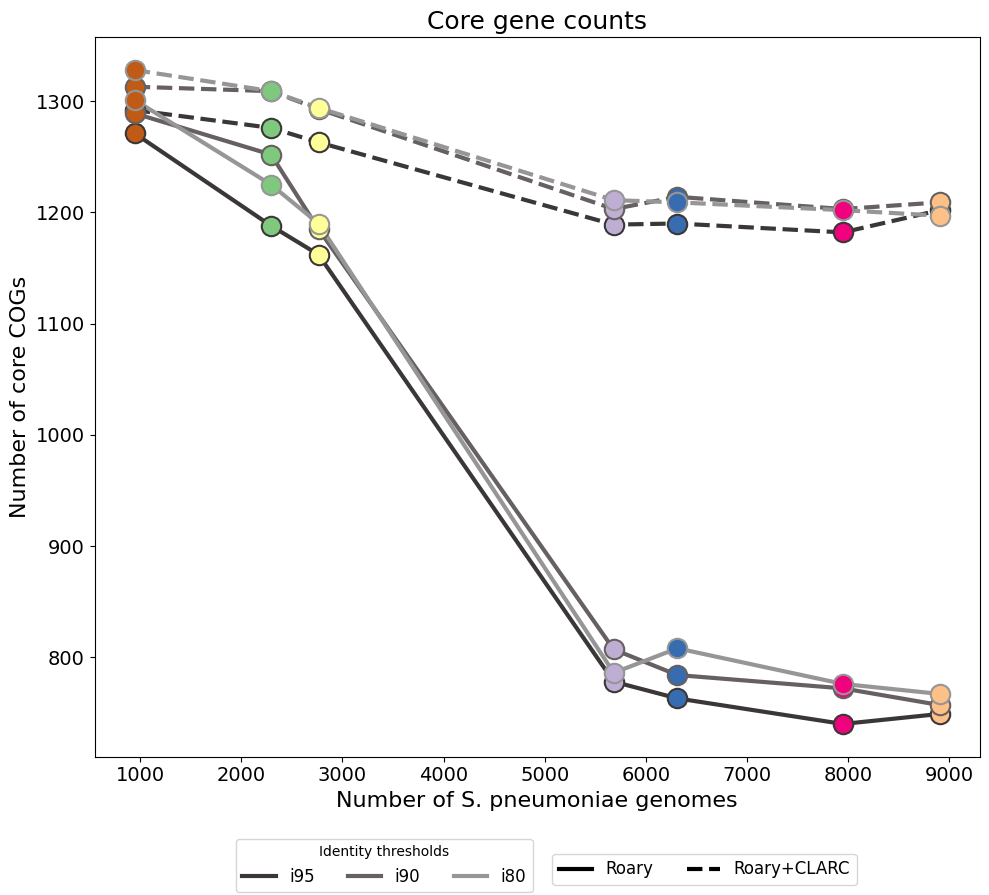

In [84]:
pop_names = ['Southwest US', 'Massachusetts', 'Southampton', 'Maela', 'Malawi', 'South Africa', 'Iceland']
genome_num = [946, 2293, 2763, 5683, 6312, 7949, 8907]
colors = ['#bf5b17', '#7fc97f', '#ffff99', '#beaed4', '#386cb0', '#f0027f', '#fdc086']

plt.plot(genome_num, roary_clarc_results_i95_mass['sw_roary_core_cogs'], linestyle='-', color='#3B3737', linewidth=3, label='Roary i95')
plt.plot(genome_num, roary_clarc_results_i95_mass['sw_rclarc_core_cogs'], linestyle='--', color='#3B3737', linewidth=3, label='Roary i95+CLARC')

plt.plot(genome_num, roary_clarc_results_i90_mass['sw_roary_core_cogs'], linestyle='-', color='#676060', linewidth=3, label='Roary i90')
plt.plot(genome_num, roary_clarc_results_i90_mass['sw_rclarc_core_cogs'], linestyle='--', color='#676060', linewidth=3, label='Roary i90+CLARC')

plt.plot(genome_num, roary_clarc_results_i80_mass['sw_roary_core_cogs'], linestyle='-', color='#969696', linewidth=3, label='Roary i80')
plt.plot(genome_num, roary_clarc_results_i80_mass['sw_rclarc_core_cogs'], linestyle='--', color='#969696', linewidth=3, label='Roary i80+CLARC')

for i, color in enumerate(colors):
    plt.plot(genome_num[i], roary_clarc_results_i95_mass['sw_roary_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#3B3737', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i95_mass['sw_rclarc_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#3B3737', markeredgewidth=1.5)

    plt.plot(genome_num[i], roary_clarc_results_i90_mass['sw_roary_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#676060', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i90_mass['sw_rclarc_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#676060', markeredgewidth=1.5)

    plt.plot(genome_num[i], roary_clarc_results_i80_mass['sw_roary_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#969696', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i80_mass['sw_rclarc_core_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#969696', markeredgewidth=1.5)

plt.xlabel('Number of S. pneumoniae genomes', fontsize=16)
plt.ylabel('Number of core COGs', fontsize=16)
plt.title('Core gene counts', fontsize=18)
plt.rcParams['figure.figsize'] = [10, 9]
plt.tick_params(axis='both', which='major', labelsize=14)

tool_legend_lines = [Line2D([0], [0], color='black', linestyle='-', linewidth=3, label='Roary'),
                     Line2D([0], [0], color='black', linestyle='--', linewidth=3, label='Roary+CLARC')]

color_legend_lines = [Line2D([0], [0], color='#3B3737', linewidth=3, label='i95'),
                      Line2D([0], [0], color='#676060', linewidth=3, label='i90'),
                      Line2D([0], [0], color='#969696', linewidth=3, label='i80')]

color_legend = plt.legend(handles=color_legend_lines, loc='lower left', bbox_to_anchor=(0.15, -0.2), fontsize='large', title='Identity thresholds', ncol=3)
tool_legend = plt.legend(handles=tool_legend_lines, loc='lower right', bbox_to_anchor=(0.87, -0.19), fontsize='large', ncol=2)

plt.gca().add_artist(color_legend)
plt.tight_layout()

plt.savefig('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure3/clarc_roary_core_counts.svg', format='svg')

plt.show()

#### Figure 3B (accessory genes Roary vs Roary+CLARC)

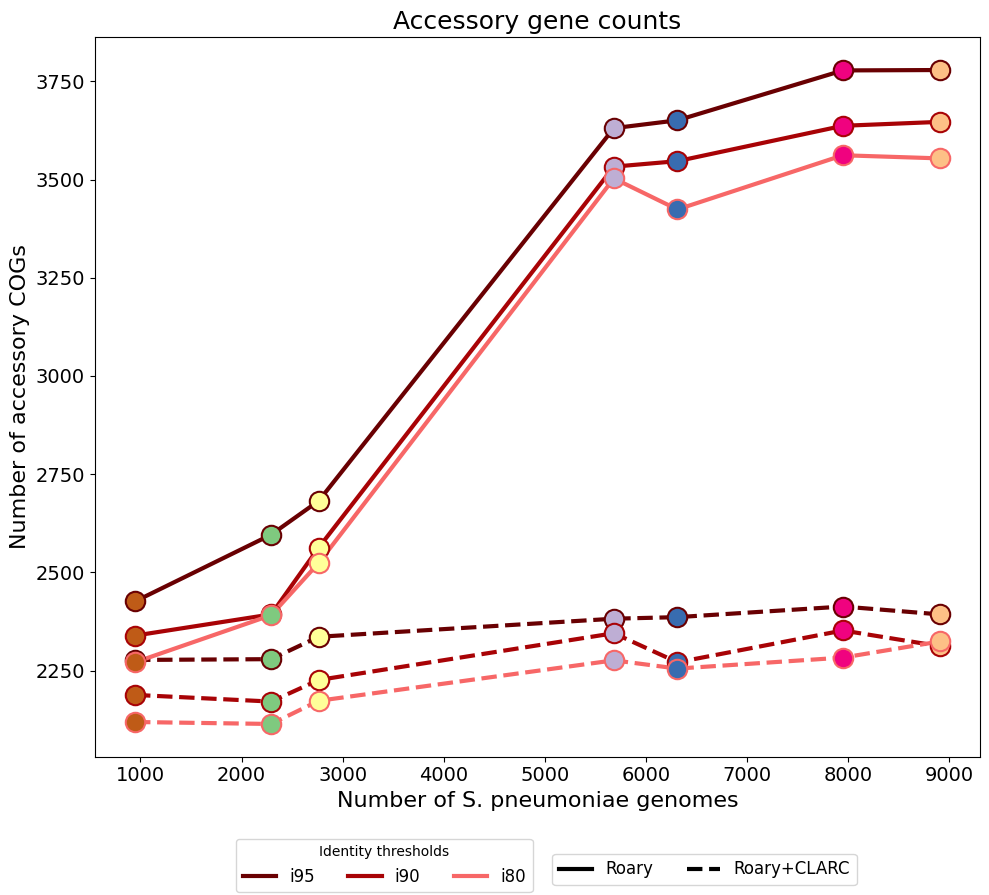

In [55]:
pop_names = ['Southwest US', 'Massachusetts', 'Southampton', 'Maela', 'Malawi', 'South Africa', 'Iceland']
genome_num = [946, 2293, 2763, 5683, 6312, 7949, 8907]
colors = ['#bf5b17', '#7fc97f', '#ffff99', '#beaed4', '#386cb0', '#f0027f', '#fdc086']

plt.plot(genome_num, roary_clarc_results_i95_mass['sw_roary_acc_cogs'], linestyle='-', color='#690002', linewidth=3, label='Roary i95')
plt.plot(genome_num, roary_clarc_results_i95_mass['sw_rclarc_acc_cogs'], linestyle='--', color='#690002', linewidth=3, label='Roary i95+CLARC')

plt.plot(genome_num, roary_clarc_results_i90_mass['sw_roary_acc_cogs'], linestyle='-', color='#A80306', linewidth=3, label='Roary i90')
plt.plot(genome_num, roary_clarc_results_i90_mass['sw_rclarc_acc_cogs'], linestyle='--', color='#A80306', linewidth=3, label='Roary i90+CLARC')

plt.plot(genome_num, roary_clarc_results_i80_mass['sw_roary_acc_cogs'], linestyle='-', color='#F76767', linewidth=3, label='Roary i80')
plt.plot(genome_num, roary_clarc_results_i80_mass['sw_rclarc_acc_cogs'], linestyle='--', color='#F76767', linewidth=3, label='Roary i80+CLARC')

for i, color in enumerate(colors):
    plt.plot(genome_num[i], roary_clarc_results_i95_mass['sw_roary_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#690002', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i95_mass['sw_rclarc_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#690002', markeredgewidth=1.5)

    plt.plot(genome_num[i], roary_clarc_results_i90_mass['sw_roary_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#A80306', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i90_mass['sw_rclarc_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#A80306', markeredgewidth=1.5)

    plt.plot(genome_num[i], roary_clarc_results_i80_mass['sw_roary_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#F76767', markeredgewidth=1.5)
    plt.plot(genome_num[i], roary_clarc_results_i80_mass['sw_rclarc_acc_cogs'][i], marker='o', color=color, markersize=14, markeredgecolor='#F76767', markeredgewidth=1.5)

plt.xlabel('Number of S. pneumoniae genomes', fontsize=16)
plt.ylabel('Number of accessory COGs', fontsize=16)
plt.title('Accessory gene counts', fontsize=18)
plt.rcParams['figure.figsize'] = [10, 9]
plt.tick_params(axis='both', which='major', labelsize=14)

tool_legend_lines = [Line2D([0], [0], color='black', linestyle='-', linewidth=3, label='Roary'),
                     Line2D([0], [0], color='black', linestyle='--', linewidth=3, label='Roary+CLARC')]

color_legend_lines = [Line2D([0], [0], color='#690002', linewidth=3, label='i95'),
                      Line2D([0], [0], color='#A80306', linewidth=3, label='i90'),
                      Line2D([0], [0], color='#F76767', linewidth=3, label='i80')]

color_legend = plt.legend(handles=color_legend_lines, loc='lower left', bbox_to_anchor=(0.15, -0.2), fontsize='large', title='Identity thresholds', ncol=3)
tool_legend = plt.legend(handles=tool_legend_lines, loc='lower right', bbox_to_anchor=(0.87, -0.19), fontsize='large', ncol=2)

plt.gca().add_artist(color_legend)

plt.tight_layout()

#plt.savefig('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure3/clarc_roary_acc_counts.svg', format='svg')

plt.show()

## Figures 3C: Searching for essential genes in the core and accessory genome of the different pangenome analysis generated

### Essential gene query analysis

#### Process BLASTP results

In [56]:
def get_blast_hit_number(blast_path):
    
    blastp_results = pd.read_table(blast_path, header=None)
    column_labels = ['query_seq_ID', 'subject_seq_ID', 'percentage_identical_matches', 'align_length','num_mismatches','gap_open','align_start_query','align_end_query','align_start_subject', 'align_end_subject','e-value','bit_score']
    blastp_results.columns = column_labels
    blastp_results = blastp_results[blastp_results['percentage_identical_matches']>90]
    blastp_hits = list(blastp_results['subject_seq_ID'].unique())
    num_blastp_hits = blastp_results['subject_seq_ID'].nunique()
    
    return num_blastp_hits, blastp_hits

In [57]:
def elements_in_list1_not_in_list2(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    return len(list(set1 - set2)), list(set1 - set2)

In [58]:
roary_i95_essential_blast_results = pd.DataFrame(columns=['populations', 'sw_roary_hits_in_acc','sw_roary_acc_hits', 'sw_roary_hits_in_core','sw_roary_core_hits', 'sw_clarc_hits_in_acc', 'sw_clarc_acc_hits', 'sw_clarc_hits_in_core', 'sw_clarc_core_hits'])

results_directory = "~/i95" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        clarc_folder = path
        roary_i95_essential_blast_results.at[counter, 'populations'] = dir_name

        og_acc_essential_blast = clarc_folder+'/essential_blasting_sw/og_acc_protein_essential_blast.tsv'
        og_core_essential_blast = clarc_folder+'/essential_blasting_sw/og_core_protein_essential_blast.tsv'

        clarc_acc_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_acc_protein_essential_blast.tsv'
        clarc_core_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_core_protein_essential_blast.tsv'

        roary_acchit_num, roary_acchit_list = get_blast_hit_number(og_acc_essential_blast)
        roary_corehit_num, roary_corehit_list = get_blast_hit_number(og_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core (since they are missing from the core, essentially)
        roary_missing_ess_found_in_acc_num, roary_missing_ess_found_in_acc = elements_in_list1_not_in_list2(roary_acchit_list, roary_corehit_list)

        clarc_acchit_num, clarc_acchit_list = get_blast_hit_number(clarc_acc_essential_blast)
        clarc_corehit_num, clarc_corehit_list = get_blast_hit_number(clarc_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core 
        clarc_missing_ess_found_in_acc_num, clarc_missing_ess_found_in_acc = elements_in_list1_not_in_list2(clarc_acchit_list, clarc_corehit_list)
        
        roary_i95_essential_blast_results.at[counter, 'sw_roary_hits_in_acc'] = roary_missing_ess_found_in_acc_num
        roary_i95_essential_blast_results.at[counter, 'sw_roary_acc_hits'] = roary_missing_ess_found_in_acc
        roary_i95_essential_blast_results.at[counter, 'sw_roary_hits_in_core'] = roary_corehit_num
        roary_i95_essential_blast_results.at[counter, 'sw_roary_core_hits'] = roary_corehit_list
        roary_i95_essential_blast_results.at[counter, 'sw_clarc_hits_in_acc'] = clarc_missing_ess_found_in_acc_num
        roary_i95_essential_blast_results.at[counter, 'sw_clarc_acc_hits'] = clarc_missing_ess_found_in_acc 
        roary_i95_essential_blast_results.at[counter, 'sw_clarc_hits_in_core'] = clarc_corehit_num
        roary_i95_essential_blast_results.at[counter, 'sw_clarc_core_hits'] = clarc_corehit_list

In [59]:
roary_i95_essential_blast_results = roary_i95_essential_blast_results.sort_values(by=['populations']).reset_index(drop=True)
roary_i95_essential_blast_results

,populations,sw_roary_hits_in_acc,sw_roary_acc_hits,sw_roary_hits_in_core,sw_roary_core_hits,sw_clarc_hits_in_acc,sw_clarc_acc_hits,sw_clarc_hits_in_core,sw_clarc_core_hits
0,navajo,15,"[unnamed_gene-SP_0889, lacD-SP_1190, unnamed_g...",324,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",10,"[unnamed_gene-SP_0889, lacD-SP_1190, unnamed_g...",329,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
1,navajo-sparc1,15,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",323,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",9,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",329,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
2,navajo-sparc1-sparc2,16,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",322,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",9,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",329,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
3,navajo-sparc1-sparc2-soton,17,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",321,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",8,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",330,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
4,navajo-sparc1-sparc2-soton-maela,106,"[unnamed_gene-SP_1081, mnmE-SP_1016, prfB-SP_0...",232,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",23,"[nusA-SP_0553, lacD-SP_1190, unnamed_gene-SP_0...",315,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
5,navajo-sparc1-sparc2-soton-maela-malawi,107,"[unnamed_gene-SP_1081, scpB-SP_1875, prfB-SP_0...",230,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",21,"[lacD-SP_1190, pbp2X-SP_0336, unnamed_gene-SP_...",316,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
6,navajo-sparc1-sparc2-soton-maela-malawi-sa,121,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",217,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",19,"[lacD-SP_1190, pbp2X-SP_0336, rplJ-SP_1355, un...",319,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
7,navajo-sparc1-sparc2-soton-maela-malawi-sa-ice...,111,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",228,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",21,"[lacD-SP_1190, unnamed_gene-SP_0888, rplJ-SP_1...",318,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."


In [60]:
roary_i90_essential_blast_results = pd.DataFrame(columns=['populations', 'sw_roary_hits_in_acc','sw_roary_acc_hits', 'sw_roary_hits_in_core','sw_roary_core_hits', 'sw_clarc_hits_in_acc', 'sw_clarc_acc_hits', 'sw_clarc_hits_in_core', 'sw_clarc_core_hits'])

results_directory = "~/i90" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        clarc_folder = path
        roary_i90_essential_blast_results.at[counter, 'populations'] = dir_name

        og_acc_essential_blast = clarc_folder+'/essential_blasting_sw/og_acc_protein_essential_blast.tsv'
        og_core_essential_blast = clarc_folder+'/essential_blasting_sw/og_core_protein_essential_blast.tsv'

        clarc_acc_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_acc_protein_essential_blast.tsv'
        clarc_core_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_core_protein_essential_blast.tsv'

        roary_acchit_num, roary_acchit_list = get_blast_hit_number(og_acc_essential_blast)
        roary_corehit_num, roary_corehit_list = get_blast_hit_number(og_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core (since they are missing from the core, essentially)
        roary_missing_ess_found_in_acc_num, roary_missing_ess_found_in_acc = elements_in_list1_not_in_list2(roary_acchit_list, roary_corehit_list)

        clarc_acchit_num, clarc_acchit_list = get_blast_hit_number(clarc_acc_essential_blast)
        clarc_corehit_num, clarc_corehit_list = get_blast_hit_number(clarc_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core 
        clarc_missing_ess_found_in_acc_num, clarc_missing_ess_found_in_acc = elements_in_list1_not_in_list2(clarc_acchit_list, clarc_corehit_list)
        
        roary_i90_essential_blast_results.at[counter, 'sw_roary_hits_in_acc'] = roary_missing_ess_found_in_acc_num
        roary_i90_essential_blast_results.at[counter, 'sw_roary_acc_hits'] = roary_missing_ess_found_in_acc
        roary_i90_essential_blast_results.at[counter, 'sw_roary_hits_in_core'] = roary_corehit_num
        roary_i90_essential_blast_results.at[counter, 'sw_roary_core_hits'] = roary_corehit_list
        roary_i90_essential_blast_results.at[counter, 'sw_clarc_hits_in_acc'] = clarc_missing_ess_found_in_acc_num
        roary_i90_essential_blast_results.at[counter, 'sw_clarc_acc_hits'] = clarc_missing_ess_found_in_acc 
        roary_i90_essential_blast_results.at[counter, 'sw_clarc_hits_in_core'] = clarc_corehit_num
        roary_i90_essential_blast_results.at[counter, 'sw_clarc_core_hits'] = clarc_corehit_list

In [61]:
roary_i90_essential_blast_results = roary_i90_essential_blast_results.sort_values(by=['populations']).reset_index(drop=True)
roary_i90_essential_blast_results

,populations,sw_roary_hits_in_acc,sw_roary_acc_hits,sw_roary_hits_in_core,sw_roary_core_hits,sw_clarc_hits_in_acc,sw_clarc_acc_hits,sw_clarc_hits_in_core,sw_clarc_core_hits
0,navajo,11,"[unnamed_gene-SP_0889, lacD-SP_1190, unnamed_g...",328,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",6,"[unnamed_gene-SP_0889, lacD-SP_1190, unnamed_g...",333,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
1,navajo_sparc1,12,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",326,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",6,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",332,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
2,navajo_sparc1_sparc2,14,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",324,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",7,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",331,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
3,navajo_sparc1_sparc2_soton,14,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",324,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",6,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",332,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
4,navajo_sparc1_sparc2_soton_maela,114,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",225,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",22,"[lacD-SP_1190, unnamed_gene-SP_0888, recR-SP_1...",317,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
5,navajo_sparc1_sparc2_soton_maela_malawi,116,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",221,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",20,"[lacD-SP_1190, recR-SP_1672, rplJ-SP_1355, gat...",317,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
6,navajo_sparc1_sparc2_soton_maela_malawi_SA,108,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",229,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",18,"[folE-SP_0291, rplL-SP_1354, lacD-SP_1190, unn...",319,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
7,navajo_sparc1_sparc2_soton_maela_malawi_SA_ice...,123,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",215,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",21,"[lacD-SP_1190, unnamed_gene-SP_0888, recR-SP_1...",317,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."


In [62]:
roary_i80_essential_blast_results = pd.DataFrame(columns=['populations', 'sw_roary_hits_in_acc','sw_roary_acc_hits', 'sw_roary_hits_in_core','sw_roary_core_hits', 'sw_clarc_hits_in_acc', 'sw_clarc_acc_hits', 'sw_clarc_hits_in_core', 'sw_clarc_core_hits'])

results_directory = "~/i80" # Replace path with location of appropiate CLARC results folder, found at Zenodo
counter = -1

# Loop through all folders within the given folder
for entry in os.listdir(results_directory):
    path = os.path.join(results_directory, entry)
    
    if os.path.isdir(path):
        
        counter = counter+1
        dir_name = entry
        clarc_folder = path
        roary_i80_essential_blast_results.at[counter, 'populations'] = dir_name

        og_acc_essential_blast = clarc_folder+'/essential_blasting_sw/og_acc_protein_essential_blast.tsv'
        og_core_essential_blast = clarc_folder+'/essential_blasting_sw/og_core_protein_essential_blast.tsv'

        clarc_acc_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_acc_protein_essential_blast.tsv'
        clarc_core_essential_blast = clarc_folder+'/essential_blasting_sw/clarc_core_protein_essential_blast.tsv'

        roary_acchit_num, roary_acchit_list = get_blast_hit_number(og_acc_essential_blast)
        roary_corehit_num, roary_corehit_list = get_blast_hit_number(og_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core (since they are missing from the core, essentially)
        roary_missing_ess_found_in_acc_num, roary_missing_ess_found_in_acc = elements_in_list1_not_in_list2(roary_acchit_list, roary_corehit_list)

        clarc_acchit_num, clarc_acchit_list = get_blast_hit_number(clarc_acc_essential_blast)
        clarc_corehit_num, clarc_corehit_list = get_blast_hit_number(clarc_core_essential_blast)

        # Now we get the genes that had hits in the accessory, but not the core 
        clarc_missing_ess_found_in_acc_num, clarc_missing_ess_found_in_acc = elements_in_list1_not_in_list2(clarc_acchit_list, clarc_corehit_list)
        
        roary_i80_essential_blast_results.at[counter, 'sw_roary_hits_in_acc'] = roary_missing_ess_found_in_acc_num
        roary_i80_essential_blast_results.at[counter, 'sw_roary_acc_hits'] = roary_missing_ess_found_in_acc
        roary_i80_essential_blast_results.at[counter, 'sw_roary_hits_in_core'] = roary_corehit_num
        roary_i80_essential_blast_results.at[counter, 'sw_roary_core_hits'] = roary_corehit_list
        roary_i80_essential_blast_results.at[counter, 'sw_clarc_hits_in_acc'] = clarc_missing_ess_found_in_acc_num
        roary_i80_essential_blast_results.at[counter, 'sw_clarc_acc_hits'] = clarc_missing_ess_found_in_acc 
        roary_i80_essential_blast_results.at[counter, 'sw_clarc_hits_in_core'] = clarc_corehit_num
        roary_i80_essential_blast_results.at[counter, 'sw_clarc_core_hits'] = clarc_corehit_list

In [63]:
roary_i80_essential_blast_results = roary_i80_essential_blast_results.sort_values(by=['populations']).reset_index(drop=True)
roary_i80_essential_blast_results

,populations,sw_roary_hits_in_acc,sw_roary_acc_hits,sw_roary_hits_in_core,sw_roary_core_hits,sw_clarc_hits_in_acc,sw_clarc_acc_hits,sw_clarc_hits_in_core,sw_clarc_core_hits
0,navajo,8,"[unnamed_gene-SP_0889, lacD-SP_1190, rsgA-SP_1...",329,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",3,"[unnamed_gene-SP_0889, xerA-SP_0890, lacD-SP_1...",334,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
1,navajo-sparc1,12,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",326,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",6,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",332,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
2,navajo-sparc1-sparc2,11,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",326,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",4,"[unnamed_gene-SP_0888, cdaA-SP_1561, unnamed_g...",333,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
3,navajo-sparc1-sparc2-soton,15,"[cdaA-SP_1561, clpX-SP_1569, unnamed_gene-SP_0...",323,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",5,"[cdaA-SP_1561, unnamed_gene-SP_0889, lacD-SP_1...",333,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
4,navajo-sparc1-sparc2-soton-maela,111,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",225,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",15,"[prfA-SP_1020, cdaA-SP_1561, unnamed_gene-SP_0...",321,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
5,navajo-sparc1-sparc2-soton-maela-malawi,102,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",234,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",21,"[lacD-SP_1190, recR-SP_1672, pbp2X-SP_0336, rp...",315,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
6,navajo-sparc1-sparc2-soton-maela-malawi-sa,120,"[unnamed_gene-SP_1081, mnmE-SP_1016, prfB-SP_0...",219,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",20,"[lacD-SP_1190, unnamed_gene-SP_0888, recR-SP_1...",319,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."
7,navajo-sparc1-sparc2-soton-maela-malawi-sa-ice...,113,"[unnamed_gene-SP_1081, prfB-SP_0755, lacD-SP_1...",225,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0...",23,"[lacD-SP_1190, unnamed_gene-SP_0888, rplJ-SP_1...",315,"[dnaA-SP_0001, unnamed_gene-SP_0008, tilS-SP_0..."


## Figure 3C: Mapping essential genes to the core and accessory genomes pre and post CLARC

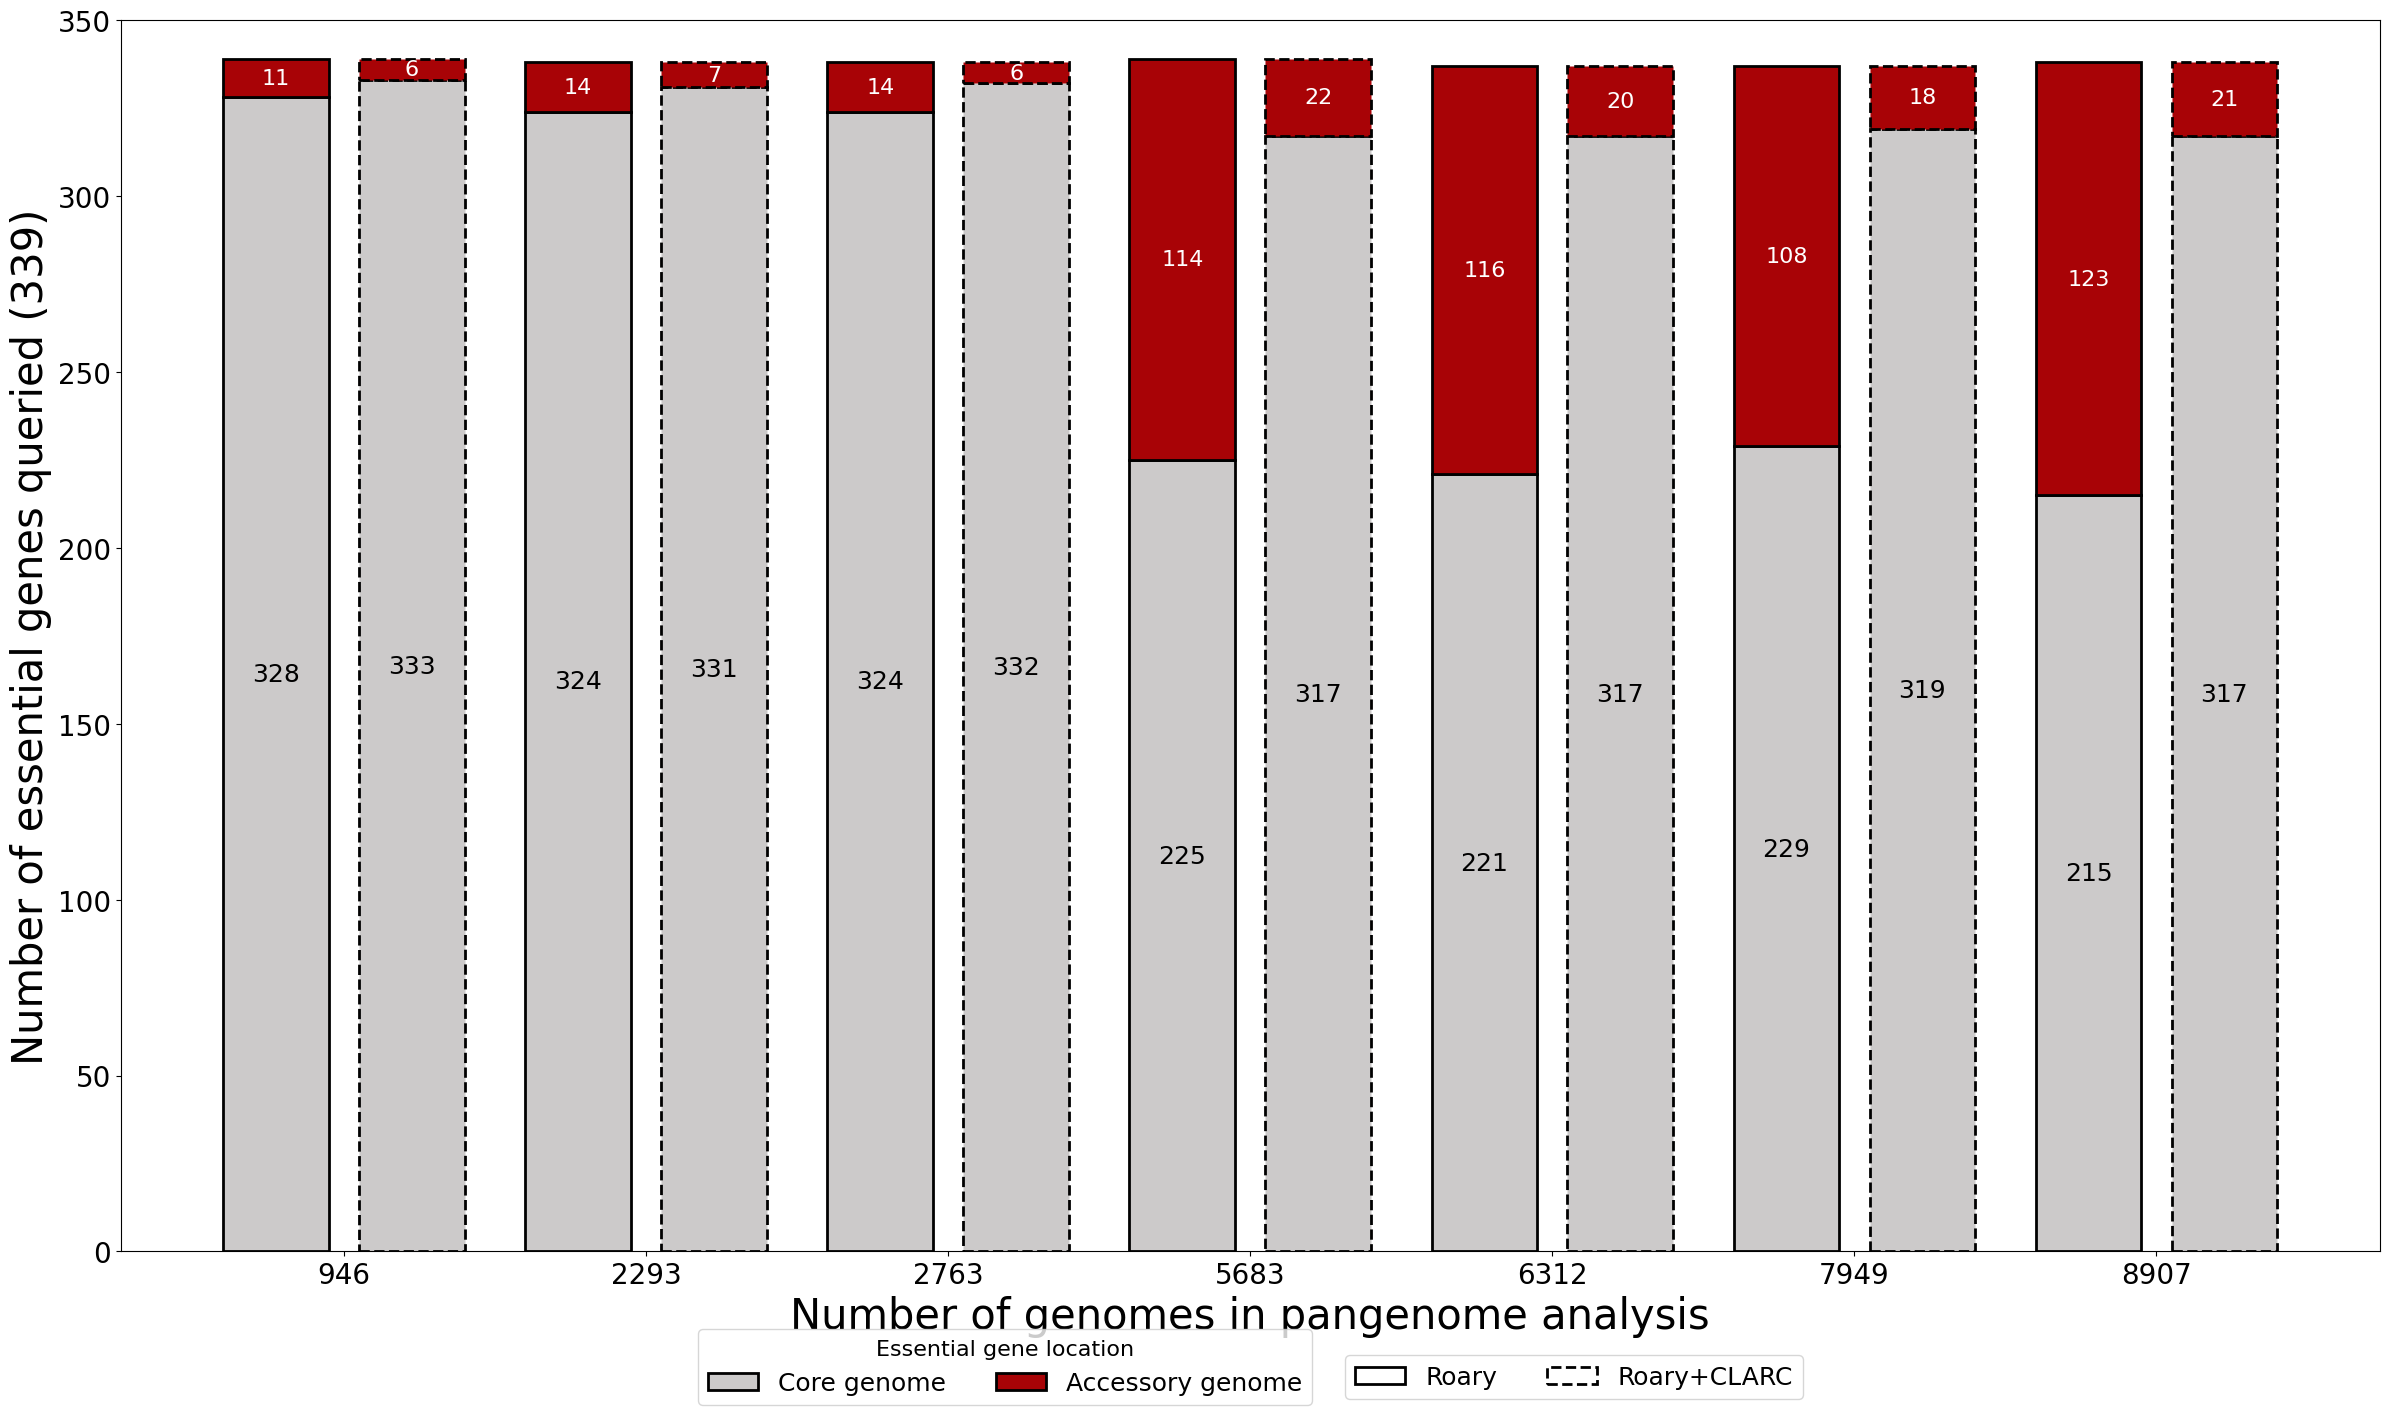

In [83]:
genome_num = ['946', '2293', '2763', '5683', '6312', '7949', '8907']
labels = ['Essential genes in core', 'Essential genes misclassified as accessory']

# Roary hits
roary_core_hits = [roary_i90_essential_blast_results.iloc[0]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[2]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[3]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[4]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[5]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[6]['sw_roary_hits_in_core'], roary_i90_essential_blast_results.iloc[7]['sw_roary_hits_in_core']]
roary_acc_hits = [roary_i90_essential_blast_results.iloc[0]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[2]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[3]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[4]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[5]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[6]['sw_roary_hits_in_acc'], roary_i90_essential_blast_results.iloc[7]['sw_roary_hits_in_acc']]

# Roary+CLARC hits
clarc_core_hits = [roary_i90_essential_blast_results.iloc[0]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[2]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[3]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[4]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[5]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[6]['sw_clarc_hits_in_core'], roary_i90_essential_blast_results.iloc[7]['sw_clarc_hits_in_core']]
clarc_acc_hits = [roary_i90_essential_blast_results.iloc[0]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[2]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[3]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[4]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[5]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[6]['sw_clarc_hits_in_acc'], roary_i90_essential_blast_results.iloc[7]['sw_clarc_hits_in_acc']]

colors = ['#cccaca', '#A80306']  
bar_width = 0.35 
bar_gap = 0.1 

fig, ax = plt.subplots(figsize=(24, 14))

x = np.arange(len(genome_num))

bar1 = ax.bar(x - bar_width / 2 - bar_gap / 2, roary_core_hits, width=bar_width, color=colors[0], edgecolor='black', linewidth=2, label=labels[0])
bar2 = ax.bar(x - bar_width / 2 - bar_gap / 2, roary_acc_hits, width=bar_width, bottom=roary_core_hits, color=colors[1], edgecolor='black', linewidth=2, label=labels[1])

bar3 = ax.bar(x + bar_width / 2 + bar_gap / 2, clarc_core_hits, width=bar_width, color=colors[0], edgecolor='black', linestyle='--', linewidth=2, label=labels[0])
bar4 = ax.bar(x + bar_width / 2 + bar_gap / 2, clarc_acc_hits, width=bar_width, bottom=clarc_core_hits, color=colors[1], edgecolor='black', linestyle='--', linewidth=2, label=labels[1])

for rects_core, rects_acc, core_hits, acc_hits in zip([bar1, bar3], [bar2, bar4], [roary_core_hits, clarc_core_hits], [roary_acc_hits, clarc_acc_hits]):
    for rect_core, rect_acc, ch, ah in zip(rects_core, rects_acc, core_hits, acc_hits):
        height_core = rect_core.get_height()
        height_acc = rect_acc.get_height()
        
        if ch > 0: 
            ax.text(rect_core.get_x() + rect_core.get_width() / 2, height_core / 2, f'{ch}', ha='center', va='center', color='black', fontsize=18)
        
        if ah > 0:  
            ax.text(rect_acc.get_x() + rect_acc.get_width() / 2, height_core + height_acc / 2, f'{ah}', ha='center', va='center', color='white', fontsize=16)

ax.set_ylim([0, 350])

ax.set_ylabel('Number of essential genes queried (339)', fontsize=30)
ax.set_xlabel('Number of genomes in pangenome analysis', fontsize=30)
#ax.set_title('Query for essential genes in different pangenome analyses', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(genome_num, fontsize=20)
ax.tick_params(axis='y', labelsize=20)

color_legend = ax.legend([bar1, bar2], ['Core genome', 'Accessory genome'], loc='lower left', bbox_to_anchor=(0.25, -0.135), fontsize=18, title="Essential gene location", title_fontsize=16, ncol=2)

roary_patch = Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', linewidth=2, label='Roary')
clarc_patch = Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', linestyle='--', linewidth=2, label='Roary+CLARC')

edge_legend = ax.legend([roary_patch, clarc_patch], ['Roary', 'Roary+CLARC'], loc='lower right', bbox_to_anchor=(0.75, -0.13), fontsize=18, ncol=2)

ax.add_artist(color_legend)

plt.savefig('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure3/clarc_essential_gene_query_core.svg', format='svg')


plt.tight_layout()
plt.show()